In [1]:
from tensorflow.keras.applications.efficientnet import EfficientNetB2
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D,Dropout,Dense
from tensorflow.keras.models import Model
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
import cv2
img = cv2.imread("./archive/garbage classification/Garbage classification/cardboard/cardboard1.jpg")
print(img.shape)

(384, 512, 3)


In [3]:
import numpy as np

In [4]:
import glob
cardboard = glob.glob('./archive/garbage classification/Garbage classification/cardboard/*.*')
glass = glob.glob('./archive/garbage classification/Garbage classification/glass/*.*')
metal = glob.glob('./archive/garbage classification/Garbage classification/metal/*.*')
paper = glob.glob('./archive/garbage classification/Garbage classification/paper/*.*')
plastic = glob.glob('./archive/garbage classification/Garbage classification/plastic/*.*')
trash = glob.glob('./archive/garbage classification/Garbage classification/trash/*.*')
data = []
labels = []

from tqdm import tqdm

for i in tqdm(cardboard):   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (260,260))
    image=np.array(image)
    data.append(image)
    labels.append(0)
    
for i in tqdm(glass):   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (260,260))
    image=np.array(image)
    data.append(image)
    labels.append(1)
    
for i in tqdm(metal):   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (260,260))
    image=np.array(image)
    data.append(image)
    labels.append(2)
    
for i in tqdm(paper):   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (260,260))
    image=np.array(image)
    data.append(image)
    labels.append(3)
    
for i in tqdm(plastic):   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (260,260))
    image=np.array(image)
    data.append(image)
    labels.append(4)
    
for i in tqdm(trash):   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (260,260))
    image=np.array(image)
    data.append(image)
    labels.append(5)

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

100%|██████████| 137/137 [00:00<00:00, 1369.27it/s]


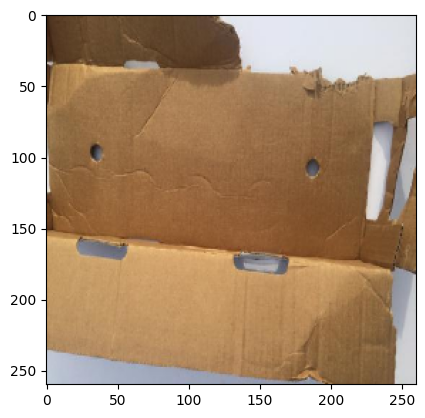

In [5]:
plt.imshow(X_train[0])

In [6]:
f = lambda x : [1 if i == x else 0 for i in range(6)]

In [7]:
ytrain = np.array([f(i) for i in ytrain])
ytest = np.array([f(i) for i in ytest])


In [8]:
print(ytrain[1])

[0 0 1 0 0 0]


In [9]:
import os

# folder path
dir_path = "./archive/garbage classification/Garbage classification/"
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    new_path=dir_path+path+"/"
    
    for path_upd in os.listdir(new_path):
        image_path=new_path+path_upd
        
        if os.path.isfile(image_path):
            count += 1
    print(f"The count of {path} is: {count}")
    count=0

The count of metal is: 410
The count of plastic is: 482
The count of cardboard is: 403
The count of trash is: 137
The count of paper is: 594
The count of glass is: 501


In [10]:
from tensorflow.keras.applications.efficientnet import EfficientNetB2
model = EfficientNetB2(input_shape=[260, 260, 3], weights = 'imagenet', include_top = False)

2022-09-18 19:46:26.177421: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 19:46:26.201864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 19:46:26.202026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 19:46:26.202910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [11]:
model.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 260, 260, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 260, 260, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 260, 260, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 260, 260, 3)  0           ['normalization[0][0

In [12]:
for layer in model.layers:
    layer.trainable = False

In [13]:
from unicodedata import name


x = GlobalAveragePooling2D(name = "avg_pool")(model.output)
x = Dropout(0.5, name = "top_dropout")(x)
prediction = Dense(6, activation = "softmax", name = "prediction")(x)
myModel = Model(inputs = model.input, outputs = prediction)
myModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 260, 260, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 260, 260, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 260, 260, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 260, 260, 3)  0           ['normalization[0][0]']      

In [14]:
myModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger

In [16]:
modelname = "myEffientNetB2"                                                                                # Step 1
folderpath      = '/home/wang/Desktop/garbage-classification/'
filepath        = folderpath + modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

csv_logger      = CSVLogger(folderpath+modelname +'.csv')                       # Step 2
callbacks_list  = [checkpoint,csv_logger]                                       # Step 3

print("Callbacks created:")
print(callbacks_list[0])
print(callbacks_list[1])
print('')
print("Path to model:", filepath)
print("Path to log:  ", folderpath+modelname+'.csv')

Callbacks created:

Path to model: /home/wang/Desktop/garbage-classification/myEffientNetB2.hdf5
Path to log:   /home/wang/Desktop/garbage-classification/myEffientNetB2.csv


In [17]:
history = myModel.fit(X_train,                            # Training data
    ytrain,                            # Training label
    validation_data=(X_test, ytest),   # Validation data and label
    epochs=60,                       # The amount of epochs to be trained
    batch_size=64,                   
    shuffle=True,                     # To shuffle the training data
    callbacks=callbacks_list)    

Epoch 1/60


2022-09-18 19:47:00.007853: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-09-18 19:47:00.822143: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-18 19:47:00.822690: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-18 19:47:00.822721: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-18 19:47:00.823226: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-18 19:47:00.823264: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


 2/32 [>.............................] - ETA: 4s - loss: 1.8214 - accuracy: 0.2344  

2022-09-18 19:47:02.712528: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


32/32 [==============================] - 17s 318ms/step - loss: 1.2400 - accuracy: 0.5408 - val_loss: 0.7721 - val_accuracy: 0.7727
Epoch 2/60
32/32 [==============================] - 7s 214ms/step - loss: 0.7039 - accuracy: 0.7739 - val_loss: 0.5590 - val_accuracy: 0.8360
Epoch 3/60
32/32 [==============================] - 7s 215ms/step - loss: 0.5560 - accuracy: 0.8278 - val_loss: 0.4750 - val_accuracy: 0.8557
Epoch 4/60
32/32 [==============================] - 7s 216ms/step - loss: 0.4817 - accuracy: 0.8412 - val_loss: 0.4302 - val_accuracy: 0.8636
Epoch 5/60
32/32 [==============================] - 7s 218ms/step - loss: 0.4471 - accuracy: 0.8615 - val_loss: 0.4026 - val_accuracy: 0.8735
Epoch 6/60
32/32 [==============================] - 7s 218ms/step - loss: 0.3968 - accuracy: 0.8728 - val_loss: 0.3788 - val_accuracy: 0.8814
Epoch 7/60
32/32 [==============================] - 7s 218ms/step - loss: 0.3960 - accuracy: 0.8684 - val_loss: 0.3631 - val_accuracy: 0.8834
Epoch 8/60
32/32

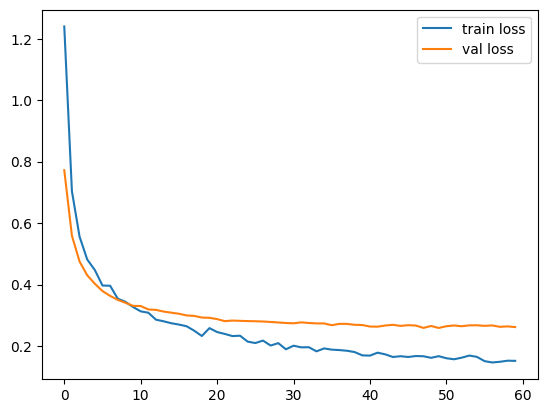

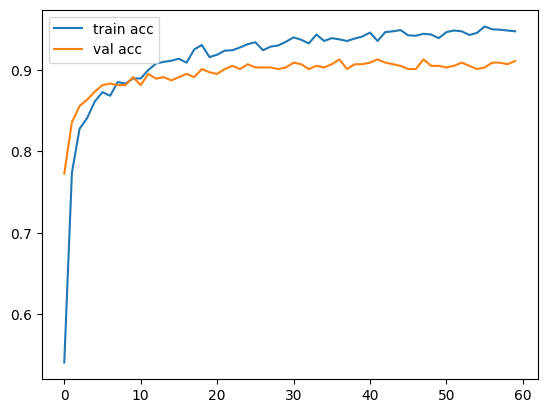

In [18]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
 
 # accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
